# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Read the data
df = pd.read_csv('orders.csv')

In [16]:
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [17]:
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_value       0
total_items       0
payment_method    0
created_at        0
dtype: int64

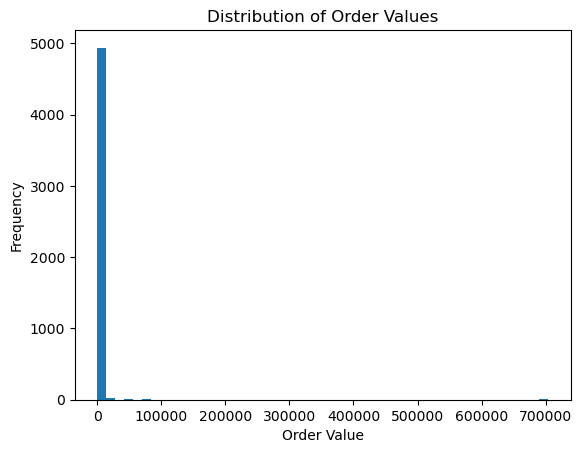

In [18]:
# Plot a histogram
plt.hist(df['order_value'], bins=50)
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values')
plt.show()

In [19]:
df['order_value'].median()

284.0

In [20]:
df['order_value'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_value, dtype: float64

- **The plot indicates that the distribution of Order Value is significantly skewed to the right, suggesting the presence of outliers with extremely high values that are likely inflating the AOV.**

- **A robust metric would be the median order value, as it is less susceptible to outliers. Additionally, you could consider using the mode or percentile rankings like the 25th, 50th, and 75th percentiles to better understand customer behavior.**

In [21]:
median_order_value = df['order_value'].median()
print(f"Median Order Value: ${median_order_value}")

Median Order Value: $284.0


/var/folders/81/_3dk3rxd2xdc7b_79h6qpkt00000gn/T/ipykernel_88464/2342143834.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.set_index('created_at').resample('D').median()['order_value']


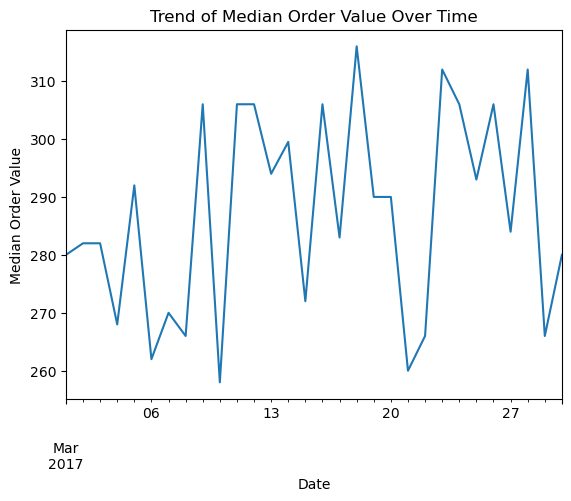

In [22]:
# Convert to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Group by day and calculate median
df_grouped = df.set_index('created_at').resample('D').median()['order_value']

# Plot the trend
df_grouped.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Median Order Value')
plt.title('Trend of Median Order Value Over Time')
plt.show()

- **In the United States, there are no federal holidays in March that would likely cause such drastic fluctuations in the median order value. However, some possibilities for the increase could be Spring Break, which often occurs in March and varies by school, or March Madness, the NCAA college basketball tournament, which also takes place in March and is a significant event in American sports. Depending on the nature of the products being sold, they might see a bump due to one of these events. Additionally, St. Patrick's Day falls on March 17th, which is a widely celebrated cultural and religious holiday in some parts of the United States, but it's less likely to cause a significant change in shopping behavior for items like sneakers. It could also be specific to the dataset and unrelated to external events. Further analysis would be needed to determine the exact cause.**